In [21]:
import matplotlib.pyplot as plt
import numpy as np

In [22]:
age = np.array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])
num = [431, 409, 429, 422, 530, 505, 459, 499, 526, 563, 587, 595, 647, 669, 746, 760, 778, 828, 846, 836, 916, 956, 1014, 1076, 1134, 1024]
age1 = [20, 21, 22, 23, 24, 25, 26, 27, 28]
age2 = [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
age3 = [39, 40, 41, 42, 43, 44, 45]
num1 = [431, 409, 429, 422, 530, 505, 459, 499, 526]
num2 = [526, 563, 587, 595, 647, 669, 746, 760, 778, 828, 846, 836]
num3 = [836, 916, 956, 1014, 1076, 1134, 1024]

In [23]:
def coeffs(x, y):
    M = np.empty((2, 2))
    M[[0], [0]] = sum((x[i])**2 for i in range(0, len(x)))
    M[[0], [1]] = sum(x)
    M[[1], [0]] = sum(x)
    M[[1], [1]] = len(x)
    M = np.linalg.inv(M)
    B = np.empty((2, 1))
    B[0] = sum((x[i] * y[i]) for i in range(0, len(x)))
    B[1] = sum((y[i]) for i in range(0, len(x)))
    p = np.dot(M, B)
    return p[1][0], p[0][0]

In [24]:
def coeffs_adv(x, y, phi):
    A = np.empty((4, 4))
    for i in range(4):
        for j in range(4):
            A[i][j] = sum((phi[i][k])*(phi[j][k]) for k in range(0, len(phi[i])))
            
    A = np.linalg.inv(A)
    
    C = np.empty((4, 1))
    for i in range(0, 4):
        C[i] = sum(y[k]*phi[i][k] for k in range(0, len(y)))
    
    ww = np.dot(A, C)
    return ww

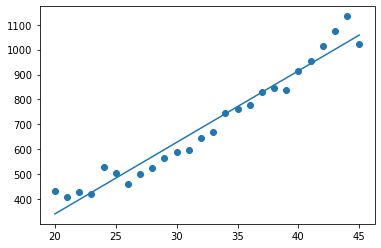

In [25]:
b, a = coeffs(age, num)
x =[]
for i in range(len(num)):
    x.append(age[i])
y = []
for i in range(len(num)):
    y.append(a * age[i] + b)

plt.plot(x, y)
plt.scatter(age, num)
plt.show()

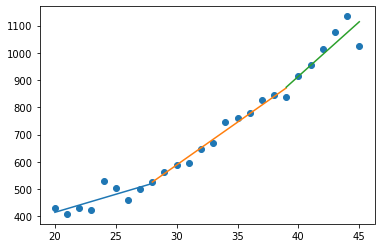

In [26]:
b1, a1 = coeffs(age1, num1)
x_new1 =[]
for i in range(len(num1)):
    x_new1.append(age1[i])
y_new1 = []
for i in range(len(num1)):
    y_new1.append(a1 * age1[i] + b1)

b2, a2 = coeffs(age2, num2)
x_new2 =[]
for i in range(len(num2)):
    x_new2.append(age2[i])
y_new2 = []
for i in range(len(num2)):
    y_new2.append(a2 * age2[i] + b2)
    
b3, a3 = coeffs(age3, num3)
x_new3 =[]
for i in range(len(num3)):
    x_new3.append(age3[i])
y_new3 = []
for i in range(len(num3)):
    y_new3.append(a3 * age3[i] + b3)

plt.plot(x_new1, y_new1)
plt.plot(x_new2, y_new2)
plt.plot(x_new3, y_new3)
plt.scatter(age, num)
plt.show()

In [29]:
phi1 = []
for i in range(len(x)):
    if (x[i] <= 28):
        phi1.append((-1/8)*x[i] + 3.5)
    else: 
        phi1.append(0.0)
phi2 = []
for i in range(len(x)):
    if (x[i] <= 28):
        phi2.append((1/8)*x[i] - 2.5)
    else: 
        if (x[i] <= 39):
            phi2.append((-1/11)*x[i] + 39/11)
        else:
            phi2.append(0.0)
phi3 = []
for i in range(len(x)):
    if (x[i] <= 28):
        phi3.append(0.0)
    else: 
        if (x[i] <= 39):
            phi3.append((1/11)*x[i] - 28/11)
        else:
            phi3.append((-1/6)*x[i] + 7.5)
phi4 = []
for i in range(len(x)):
    if (x[i] <= 39):
        phi4.append(0.0)
    else:
        phi4.append((1/6)*x[i] - 6.5)
phi = []
phi.append(phi1)
phi.append(phi2)
phi.append(phi3)
phi.append(phi4)

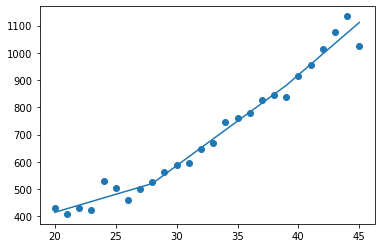

In [30]:
A = coeffs_adv(x, num, phi)
Y = []
for i in range(len(num)):
    Y.append(A[0][0]*phi1[i] + A[1][0]*phi2[i] + A[2][0]*phi3[i] + A[3][0]*phi4[i])

plt.plot(x, Y)
plt.scatter(age, num)
plt.show()

In [31]:
err1 = []
err2 = []
err3 = []
y_s = y_new1 + y_new2 + y_new3
y_s.pop(len(y_new1))
y_s.pop(len(y_new1) + len(y_new2) - 1)
for i in range(len(num)):
    err1.append(num[i] - y[i])
    err2.append(num[i] - y_s[i])
    err3.append(num[i] - Y[i])
print("Ошибка 1 =", (np.linalg.norm(err1))**2)
print("Ошибка 2 =", (np.linalg.norm(err2))**2)
print("Ошибка 3 =", (np.linalg.norm(err3))**2)

Ошибка 1 = 56451.89675213676
Ошибка 2 = 25269.91358537426
Ошибка 3 = 25092.25847663511
